Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

## Authors and hours spent on the assignment
**Names:** Wei Wu and Lina Hammargren

**Hours:** Around 15 hours each

In [ ]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11493376/11490434 [==============================] - 0s 0us/step


**Preprocessing**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)


### Answer to question 1: Explain the data preprocessing in the notebook

First, we note that the data consists of images. The maximum value of the pixels is 255 and the minimum value is 0. So what happens when we divide the data by 255 is that we convert the data to values between 0 and 1 (we normalize our values). We also saw that the elements were integers, so first we needed to convert the elements to floating point numbers to be able to perform the normalization. 

1. Convert the training and test data to floating point numbers
2. Normalize the values - divide the numbers by 255 (so that they are between 0 and 1)
3. Convert y_train and y_test to categorical values (these are the target values/labels)

We normalize the values to make the input features on the same order of magnitude, this makes the training easier. (source: the intro to neural networks from module 7, neural_networks_intro.ipynb)

### Answer to question 2 a:
* #### How many layers does the network in the notebook have? How many neurons does each layer have?:
The model.add() function adds layers to the network.

**model.add(Flatten()):**
Here we convert the input which is a 28x28 array into a one dimensional (1x784) array. 

**model.add(Dense(64, activation = 'relu')):**
Hidden layer 1: 64 neurons, ReLU activation function

**model.add(Dense(64, activation = 'relu')):**
Hidden layer 2: 64 neurons, ReLU activation function

**model.add(Dense(num_classes, activation='softmax')):**
Output layer 1: 10 neurons, softmax activation function. (num_classes is 10, the amount of classes)

So the model has four layers counting the Flatten() layer.

Each layer has the following neurons:
Layer 1: 64, Layer 2: 64, Layer 3: 10


* #### What activation functions and why are these appropriate for this application?:
ReLu in the two middle layers, softmax in the last layer. ($b_i$ is the local field of the neuron).

ReLU: $f(b_i)= \begin{cases} 
      0 & b_i< 0 \\
      b_i & b_i \geq 0 \\
   \end{cases} = max(b_i,0)
$

Source: https://keras.io/api/layers/activations/#relu-function

Softmax: $f(b_i)=\frac{e^{b_i}}{\sum_{k=1}^{num\_classes}e^{b_k}}$

Source: https://keras.io/api/layers/activations/#softmax-function


We start by discussing the ReLU function, and first state that its derivative is 1 when $b_i>=0$. Compare this to for example the tanh function where the derivative is between 0 and 1. When doing back-propagation we multiply the derivatives of the activation function, and using a function with a derivative that is smaller than 1 this causes the so-called vanishing-gradient problem that causes the initial layers to not be updated efficiently.

Moving on to the softmax function, which is our output layer, the output of the function can be interpreted as probabilities. So the value for the i:th neuron represent the probability of the input belonging to one of the classes.

* #### What is the total number of parameters for the network?:
55 050 (from model.summary() below)


* #### Why does the input and output layers have the dimensions they have?:
The input layer is a vector of 1x784, the 2-dim image in vector form. The output layer has 1 x num_classes (1*10) dimension, this is because we use the softmax function which outputs the probability of the input belonging to one of the classes, and we have 10 classes which are the integers from 0 to 9.


### Answer to question 2 b:

**What loss-function is used to train the network?**
Categorical cross-entropy.

**What is the functional form (mathematical expression) of the loss function? and how should we interpret it?**:

To reiterate, we have a total of 10 classes, the classes being 0,1,2,3,4,5,6,7,8,9.

$t_i :=$ target value (true value) for the input $i=1,...,num\_classes$

$O_i :=$ output of the network (the softmax of the last layer) $i=1,...,num\_classes$

The categorical cross-entropy function is then:

$H=-\sum_{i=1}^{num\_classes}t_ilog(O_i)$


As previously mentioned, the output of the function when using softmax can be interpreted as probabilities. So the closer we are to one, the smaller this value will be (log(x)=0 if x=1 and negative if x<1) and it cannot be larger than one because we are dividing the value $e^{b_i}$ by the sum $\sum_{k=1}^{num\_classes}e^{b_k}$.


**Why is it appropriate for the problem at hand?**:
It is appropriate because we have a multi-class classification problem. Taking for example the mean squared error, this loss function is better when we have a continuous target variable, because we are measuring the difference between the input and the target value.

### Answer to question 2 c: train the network for 10 epochs and plot the training and validation accuracy for each epoch (below)

In [ ]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7992 - accuracy: 0.7734 - val_loss: 0.2743 - val_accuracy: 0.9214
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2436 - accuracy: 0.9287 - val_loss: 0.1817 - val_accuracy: 0.9476
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1760 - accuracy: 0.9489 - val_loss: 0.1652 - val_accuracy: 0.9519
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1381 - accuracy: 0.9605 - val_loss: 0.1344 - val_accuracy: 0.9608
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1179 - accuracy: 0.9663 - val_loss: 0.1162 - val_accuracy: 0.9656
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1057 - accuracy: 0.9700 - val_loss: 0.1089 - val_accuracy: 0.9652
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9723 - val_loss: 0.1059 - val_accuracy: 0.9687
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


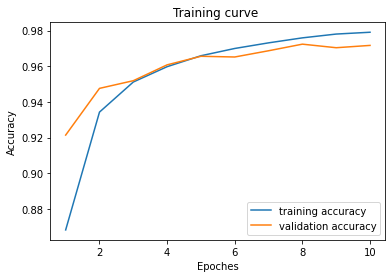

In [ ]:
#validation accuracy for each epoch

x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, fit_info.history['accuracy'], label = "training accuracy")
plt.plot(x, fit_info.history['val_accuracy'],label = "validation accuracy")
plt.title('Training curve ')
plt.legend()
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.show()


### Answer to question 2 d: update the model to implement a three-layer neural network where the hidden-layers has 500 and 300 hidden units respectively.

In [ ]:
from tensorflow.keras import regularizers

factors=[0.000001, 0.00001, 0.0001, 0.0002, 0.001]
results=[]


for i in factors:
    for j in range(3):
        ## Define model ##
        model2d = Sequential()

        ## Layers ##
        model2d.add(Flatten())
        model2d.add(Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(i)))
        model2d.add(Dense(300, activation = 'relu', kernel_regularizer=regularizers.l2(i)))
        model2d.add(Dense(num_classes, activation='softmax'))


        model2d.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)


        fit_info2d = model2d.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=40,
            verbose=0, # don't print out all results all of the time
           validation_data=(x_test, y_test))
        score2d = model2d.evaluate(x_test, y_test, verbose=0)
        print('Test loss 2d: {}, Test accuracy 2d: {}'.format(score2d[0], score2d[1]))
        print(i)
        results.append([score2d[1], i, j])

Test loss 2d: 0.06775666773319244, Test accuracy 2d: 0.98089998960495
1e-06
Test loss 2d: 0.06613609939813614, Test accuracy 2d: 0.9818999767303467
1e-06
Test loss 2d: 0.06800728291273117, Test accuracy 2d: 0.9819999933242798
1e-06
Test loss 2d: 0.07857230305671692, Test accuracy 2d: 0.9804999828338623
1e-05
Test loss 2d: 0.07534421980381012, Test accuracy 2d: 0.9811999797821045
1e-05
Test loss 2d: 0.07407547533512115, Test accuracy 2d: 0.9821000099182129
1e-05
Test loss 2d: 0.11602920293807983, Test accuracy 2d: 0.982200026512146
0.0001
Test loss 2d: 0.1214580163359642, Test accuracy 2d: 0.9828000068664551
0.0001
Test loss 2d: 0.12167803943157196, Test accuracy 2d: 0.982200026512146
0.0001
Test loss 2d: 0.12338713556528091, Test accuracy 2d: 0.9825000166893005
0.0002
Test loss 2d: 0.12246979773044586, Test accuracy 2d: 0.9830999970436096
0.0002
Test loss 2d: 0.12300153821706772, Test accuracy 2d: 0.984000027179718
0.0002
Test loss 2d: 0.11722493916749954, Test accuracy 2d: 0.982100009

**Comment on the result:** the accuracy increases when we add regularizers. We get around 0.98 test accuracy.

Text(0.5, 1.0, 'Accuracy as a function of regularization factors')

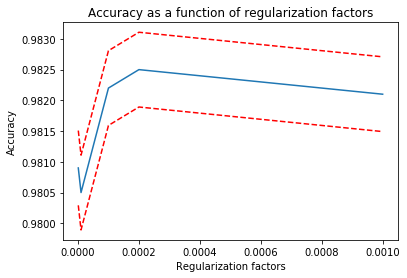

In [ ]:
import statistics
import matplotlib.pyplot as plt

stds=[]

#print(results)
for x in range(0,len(results),3):
    temp=[]
    for i in range(3):
        temp.append(results[i][0])
    stds.append(statistics.stdev(temp))

chosen=[results[x][0] for x in range(0,len(results),3)]
#print(factors)
#print(stds)
#print(chosen)
plt.plot(factors, chosen, label="Validation accuracy")
plt.plot(factors, [chosen[i]-stds[i] for i in range(len(stds))], label="Lower", c='r', ls='--')
plt.plot(factors, [chosen[i]+stds[i] for i in range(len(stds))], label="Upper", c='r', ls='--')
plt.xlabel('Regularization factors')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of regularization factors')

**Comment:** The accuracy is the largest for regularization factors of 0.0002.

### Answer to question 3 a: design a model that makes use of at least one convolutional layer - how performant a model can you get?

We added one convolutional layer of filters with dimensionality of the output space 64 and 32 respectively and (3,3) kernel size. We also added two pooling layers of dimension (2,2). The convolutional layers generate feature maps, which are the result of applying a filter to the input image. In addition to the convolutional layers we added pooling layers with the MaxPooling2d()-function, which takes the maximum value over the area defined by its argument (2,2). The pooling layer reduces the dimensions of the input. 

Sources: 
MaxPooling2d: https://keras.io/api/layers/pooling_layers/max_pooling2d/
Conv2D: https://keras.io/api/layers/convolution_layers/convolution2d/

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
i=0.0002 # received the highest accuracy in 2 d
results3=[]

## Define model ##
model3 = Sequential()

## Layers ##
model3.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(i)))
model3.add(Dense(300, activation = 'relu', kernel_regularizer=regularizers.l2(i)))
model3.add(Dense(num_classes, activation='softmax'))


model3.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)


fit_info3 = model3.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=40,
            verbose=1, 
           validation_data=(x_test, y_test))
score3 = model3.evaluate(x_test, y_test, verbose=1)
print('Test loss 3a: {}, Test accuracy 3a: {}'.format(score3[0], score3[1]))
print(i)
results3.append([score3[1], i, j])

Epoch 1/40
469/469 [==============================] - 39s 84ms/step - loss: 0.5721 - accuracy: 0.8813 - val_loss: 0.2803 - val_accuracy: 0.9725
Epoch 2/40
469/469 [==============================] - 38s 80ms/step - loss: 0.2739 - accuracy: 0.9744 - val_loss: 0.2437 - val_accuracy: 0.9831
Epoch 3/40
469/469 [==============================] - 36s 77ms/step - loss: 0.2412 - accuracy: 0.9828 - val_loss: 0.2307 - val_accuracy: 0.9840
Epoch 4/40
469/469 [==============================] - 35s 76ms/step - loss: 0.2237 - accuracy: 0.9868 - val_loss: 0.2315 - val_accuracy: 0.9823
Epoch 5/40
469/469 [==============================] - 37s 78ms/step - loss: 0.2095 - accuracy: 0.9892 - val_loss: 0.2060 - val_accuracy: 0.9883
Epoch 6/40
469/469 [==============================] - 36s 78ms/step - loss: 0.1981 - accuracy: 0.9908 - val_loss: 0.2066 - val_accuracy: 0.9871
Epoch 7/40
469/469 [==============================] - 36s 76ms/step - loss: 0.1874 - accuracy: 0.9924 - val_loss: 0.1941 - val_accuracy:

In [ ]:
results3

[[0.9878000020980835, 0.0002, 2]]

**Comment:** We get an accuracy of ~0.988 in our CNN. This is not 0.99. To achieve a higher accuracy we tried switching to the 'Adam' optimizer but this did not work. 

### Answer to question 3 b: Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the particular application.

Convolutional neural networks take the images in its 28x28 format as inputs while the networks from question 2 c and 2 d are fully connected layers that transform the image into a vector before training the model. Our data are images of handwritten digits (in our case 2-dimensional arrays) so adding one or more convolutional layers before the fully connected layers may capture patterns that the fully connected networks may not. In addition, a fully connected layer may run the risk of overfitting, while a convolutional layer adds a filter to the image. 


### Question 4) Auto-Encoder for denoising


### Answer to question 4 a: 

* The notebook implements a simple denoising deep autoencoder model. Explain what the model does: use the data-preparation and model-definition code to explain how the goal of the model is achieved.

x_train is the 28x28 image so when we use x_train.reshape(-1,784) we turn the image into a 1x784 vector and the result is in flattened_x_train. To "season" the vector with noise, we apply the salt_and_pepper() function defined below. The result is flattened_x_train_seasoned which is the image vector with noise. The same is done for the test data x_test.

Moving on to the model, it is an autoencoder. The model consists of an encoder and a decoder. The encoder consists of two fully connected layers with ReLU activation functions. The first layer consists of 128 neurons which is then mapped to a layer with fewer neurons (96). Then, the decoder layers maps the encoder layer back to its original dimensions (28*28=784).

* Explain the role of the loss function.

The binary cross-entropy loss computes the cross-entropy loss between true labels and predicted labels. This is used when there are only two label classes. 

In [ ]:
# Draw a diagram and include it in the report
from IPython.display import Image
Image("image.jpg")

In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


* Train the model with the settings given.

In [ ]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1914 - val_loss: 0.1537
Epoch 2/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1471 - val_loss: 0.1397
Epoch 3/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1368 - val_loss: 0.1332
Epoch 4/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1316 - val_loss: 0.1291
Epoch 5/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1284 - val_loss: 0.1289
Epoch 6/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1263 - val_loss: 0.1259
Epoch 7/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1247 - val_loss: 0.1256
Epoch 8/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1233 - val_loss: 0.1247
Epoch 9/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1222 - val_loss: 0.1238
Epoch 10/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1212 - val_loss: 0.1249

### Answer to question 4 b: 
Add increasing levels of noise to the test-set using the salt_and_pepper()-function. Use matplotlib to visualize a few examples (0.5,0.6,0.7,0.8). Use matplotlib to visualize the examples in the original and the "seasoned" version. Use the trained autoencoder to denoise the noisy digits. 

* At what noise level does it become difficult to identify the digits? 

* At what noise level does the denoising stop working?

**Explanation of the noiselevel_seasoned list:**
There are 10000 images in the test set, we now have 40000 images in the noiselevel_seasoned dataset.


In [ ]:
# Seasoning the images
noiselevel_seasoned=[]

for i in [0.5,0.6,0.7,0.8]:
    noiselevel_seasoned.extend(salt_and_pepper(flattened_x_test, noise_level=i))

# 
#vis1=noiselevel_seasoned[1].reshape(28,28)
#plt.imshow(vis1)

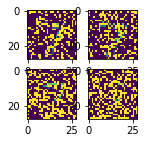

In [ ]:
import numpy as np
list3=np.array(noiselevel_seasoned)
list3.shape

vis1=noiselevel_seasoned[0].reshape(28,28)
vis2=noiselevel_seasoned[10000].reshape(28,28)
vis3=noiselevel_seasoned[20000].reshape(28,28)
vis4=noiselevel_seasoned[30000].reshape(28,28)

fig=plt.figure(figsize=(2,2))
fig.add_subplot(2,2,1)
plt.imshow(vis1)
fig.add_subplot(2,2,2)
plt.imshow(vis2)
fig.add_subplot(2,2,3)
plt.imshow(vis3)
fig.add_subplot(2,2,4)
plt.imshow(vis4)

**Comment:** In the first two rows (corresponding to noise levels 0.5 and 0.6) it is still possible to distinguish the number 7. In the bottom two rows it is very difficult (for noise level 0.7 and 0.8).

In [ ]:
def visualize(index,encoder,decoder):
    """Draws original, encoded and decoded images"""
    
    img = flattened_x_train_seasoned[index]
    og_img = x_train[index] 
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    #visualizaiton few examples
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(np.reshape(og_img, (28,28)), cmap='gray')
    
    plt.subplot(1,3,2)
    plt.title("Noisy")
    plt.imshow(np.reshape(img, (28,28)), cmap='gray')

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(np.reshape(reco, (28,28)), cmap='gray')
    plt.show()

def reconstruct_images(encoder, decoder):
    reconstruct = []
    for i, img in enumerate(flattened_x_train_seasoned):
        if i % 500 == 0:
            print(i)
        
        code = encoder.predict(img[None])[0]
        recos.append(decoder.predict(code[None])[0])
    
    return reconstruct


def reconstruct_test_images(encoder, decoder):
    recostruct = []
    for i, img in enumerate(flattened_x_test_seasoneed):
        if i % 500 == 0:
            print(i)
        
        code = encoder.predict(img[None])[0]
        recos.append(decoder.predict(code[None])[0])
    
    return recostruct




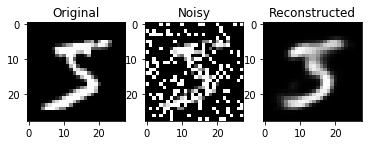

Noise level: 0.1


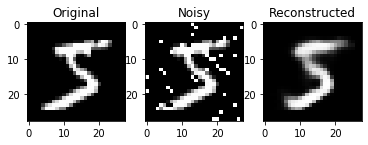

Noise level: 0.2


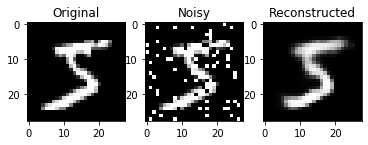

Noise level: 0.30000000000000004


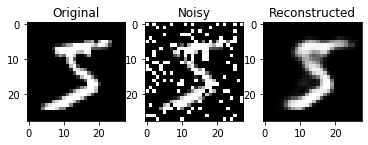

Noise level: 0.4


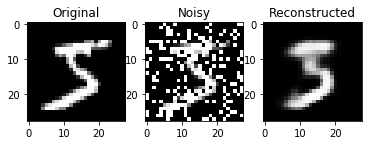

Noise level: 0.5


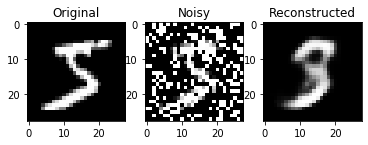

Noise level: 0.6


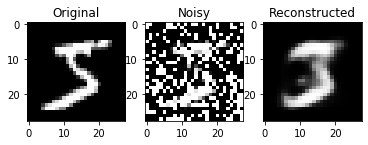

Noise level: 0.7


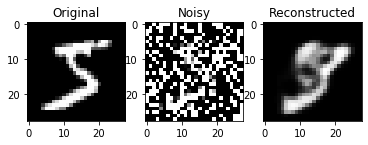

Noise level: 0.7999999999999999


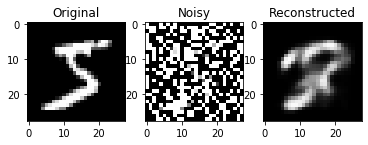

Noise level: 0.8999999999999999


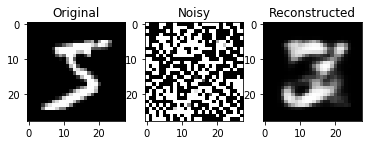

Noise level: 0.9999999999999999


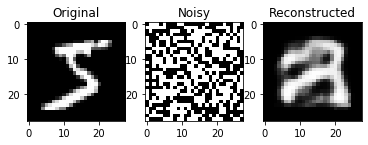

In [ ]:
visualize(0, encoder_only, decoder)

x = 0.1

while x <= 1:
    if x != 0:
        flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=x)
        flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=x)
        print("Noise level:", str(x))
        visualize(0, encoder_only, decoder)
    x+=0.1

**Comment:** 

* At what noise level does it become difficult to identify the digits? 

From the noise level around 0.7, it becomes difficult to identify the digits.

* At what noise level does the denoising stop working?

From the noise level 0.8. 

### Answer to question 4 c:
Test whether denoising improves classification with the best performing model obtained in questions 2 or 3. Plot the true-positive rate as a function of noise level for the seasoned and denoised datasets - assume that the correct classification is the most likely class-label. Discuss your results.

**Predicting classes for the two datasets**

In [ ]:
# list3 are the seasoned images, we reshape this list for the input
list_4c=np.array([list3[i].reshape(28,28,1) for i in range(len(list3))])
list_4c.shape

# # # Classify noisy images
noisy_predictions=model3.predict_classes(list_4c)

# # # Classify denoised images - DID NOT WORK
#denoised_images=autoencoder(list3)
#denoised_images=np.array([tf.reshape(denoised_images[i],[28,28]) for i in range(len(denoised_images))])
#denoised_predictions=model3.predict_classes(denoised_images)

**Function for counting true positives in the confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

def count_TP(y_true, y_pred):
    # returns the index of the True value
    y_trueconv=[np.argmax(y_true[i]) for i in range(len(y_true))]
    confmat=confusion_matrix(y_trueconv, y_pred)
    
    # sums the diagonals (the true positives)
    return sum(np.diag(confmat))

**The plot of true-positive rate as a function of noise level**

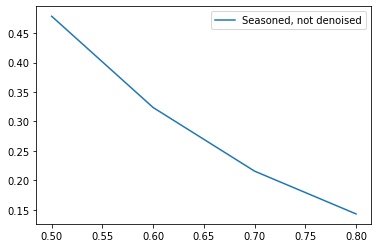

In [ ]:
# TP for the seasoned images
noise0_5=count_TP(y_test, noisy_predictions[0:10000])
noise0_6=count_TP(y_test, noisy_predictions[10000:20000])
noise0_7=count_TP(y_test, noisy_predictions[20000:30000])
noise0_8=count_TP(y_test, noisy_predictions[30000:40000])

#denoised0_5=count_TP(y_test, denoised_predictions[0:10000])
#denoised0_6=count_TP(y_test, denoised_predictions[10000:20000])
#denoised0_7=count_TP(y_test, denoised_predictions[20000:30000])
#denoised0_8=count_TP(y_test, denoised_predictions[30000:40000])

TP_list_seasoned=[noise0_5/10000,noise0_6/10000,noise0_7/10000,noise0_8/10000]
#TP_list_denoised=[denoised0_5,denoised0_6,denoised0_7,denoised0_8]
noise_list=[0.5 ,0.6 ,0.7 ,0.8]



plt.plot(noise_list,TP_list_seasoned,  label='Seasoned, not denoised')
#plt.plot(TP_list_denoised, noise_list, label='Seasoned, denoised', c='b')
plt.legend()

In [ ]:
# True positive values
TP_list_seasoned

[4786, 3237, 2157, 1431]

**Discuss the results of 4 C:** Unfortunately we did not get the denoised predictions to work. But for the seasoned images which are not denoised 

